In [1]:
# -*- coding: utf-8 -*-

# Pandora to Pandas file reader


This tutorial explains how to use the "Pandora to Pandas" file reader.

Author: Daniel Santana Díaz

------------------------------------------------

**Updates**:
- 20221113: Added support for iso datetime formats with floating seconds, ie: 20210918T112014.8Z

------------------------------------------------

**Installation instructions:**

1 - Download or clone the "Pandora To Pandas File Reader" repository from [here](https://gitlab.com/Luftblick/Pandora_To_Pandas_File_Reader):

2 - Install python (In theory it works with any version, tested with 2.7, 3.x should work as well)

3 - Install the following python modules:

- pandas
- matplotlib
- ipympl (only in case you need interactive plots)


you can install these modules by executing "pip install pandas matplotlib ipympl"


-----------------------------------------------


In [2]:
#Import necessary python libs
import pandas
import matplotlib.pyplot as plt
import datetime

#Import Pandora To Pandas File Reader:
import Pandora_To_Pandas_File_Reader as fr

#This is only to limit the number of dataframe rows showed in this tutorial. (To make it shorter, summarized)
pandas.set_option('display.max_rows', 15)

## How to load a pandora file into a pandas DataFrame

In [3]:
#Define the file path:
#It can be an absolute path, or a relative path respect the path where this ipython notebook is running:
filepath= "./Tutorial_data/Pandora120s1_Davos_20210918_L1_smca1c1p1-7_test.txt" 

#To load a pandora file (L0, L1, or L2 data) we can use the load_pandora_data() function.
DF,FF = fr.load_pandora_data(filepath)

#This function returns a pandas.DataFrame object (DF) that contains the data, 
#and a "File Format" dictionary (FF), which contains the identificative keywords for each column of the dataframe.

Reading file: ./Tutorial_data/Pandora120s1_Davos_20210918_L1_smca1c1p1-7_test.txt
Detected file type:Level 1 file (corrected signals)


In [4]:
#Lets show what is in the DataFrame (the first 10 rows):
DF.head(10)

0                       1           2     3     4      5     6      7     \
0   SQ 2021-09-18 11:20:14.800  7931.47239   274     1   9.58     2  17.27   
1   SQ 2021-09-18 11:20:24.800  7931.47251   274     2   9.80     2  17.27   
2   SQ 2021-09-18 11:20:34.800  7931.47262   274     3   9.49     2  17.27   
3   SQ 2021-09-18 11:20:44.500  7931.47274   274     4   9.82     2  17.27   
4   SQ 2021-09-18 11:20:54.600  7931.47285   274     5   9.56     2  17.27   
5   SQ 2021-09-18 11:21:04.400  7931.47297   274     6   9.79     2  17.27   
6   SS 2021-09-18 11:21:22.500  7931.47318   275     1  28.50     2  10.08   
7   SS 2021-09-18 11:21:51.300  7931.47351   275     2  28.32     2  10.08   

   8     9     ...  6218  6219  6220  6221  6222  6223  6224  6225  6226  6227  
0   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
1   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
2   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
3   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
4   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
5   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
6  2639   537  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
7  2639   537  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  

[8 rows x 6228 columns]

In [5]:
#One column of the pandas.DataFrame object is called a pandas.Series object.
#We can obtain the Series object simply calling to the DF column number. 

#For example:
DF[1]

0   2021-09-18 11:20:14.800
1   2021-09-18 11:20:24.800
2   2021-09-18 11:20:34.800
3   2021-09-18 11:20:44.500
4   2021-09-18 11:20:54.600
5   2021-09-18 11:21:04.400
6   2021-09-18 11:21:22.500
7   2021-09-18 11:21:51.300
Name: 1, dtype: datetime64[ns]

In [6]:
#One row of a pandas.DataFrame object is also a pandas.Series object.
#We can acces to a DF row using one of these two methods: 
#DF.loc[index] -> The DataFrame index is something like the "row name" of the DF, and is shown at the very left side of the DF. By default are integers, but may be changed to strings, or floats if needed. 
#DF.iloc[nth column] -> This is to access the Nth row of the DataFrame, useful for when we don't know the name of that row.

#For example, to see the first 20 elements of the row (name) 0:
DF.loc[0][0:20]

0                             SQ
1     2021-09-18 11:20:14.800000
2                     7931.47239
3                            274
4                              1
                 ...            
15                           0.0
16                             1
17                          -1.0
18                           507
19                             1
Name: 0, Length: 20, dtype: object

In [7]:
#We can convert any pandas.Series object into a list, with the .tolist() command:
DF[1].tolist() #for columns
#or DF.loc[0].tolist() #for rows

[Timestamp('2021-09-18 11:20:14.800000'),
 Timestamp('2021-09-18 11:20:24.800000'),
 Timestamp('2021-09-18 11:20:34.800000'),
 Timestamp('2021-09-18 11:20:44.500000'),
 Timestamp('2021-09-18 11:20:54.600000'),
 Timestamp('2021-09-18 11:21:04.400000'),
 Timestamp('2021-09-18 11:21:22.500000'),
 Timestamp('2021-09-18 11:21:51.300000')]

## How to get the values of a determined column using Keywords 
(Recommended way to access the data)

In [8]:
#Very short introduction to the keywords:

#-Different pandoras may have different L0/L1 file formats. It depends of the hardware configuration of each pandora, 
# for example there are pandoras with only one or two filterhweels, with 1024 or 2048 pixels, 
# with/without sensors in the head, etc.. 

#-This basically means that the number of columns of the data loaded is different for each pandora.

#-One good solution for doing versatile scripts that can work for all pandora files independently of their format
#is working with keywords.

#-Keywords are simplified names, that are assigned to every column of the pandora files (L0/L1/L2). For example:
# "Routine" is the keyword used to identify the column with description "Two letter code of measurement routine"

#-The load_pandora_data() function reads the file header, and look for identifiers in the column descriptions.
# Then it returns the File Format Dict (FF), that contains the necesary keywords-columns bindings.



#Example: using the keyword "Routine" to access to the 'Two letter code of measurement routine' column of the DF dataframe:

#step1: Get the column number assigned to the desired keyword;
keyword="Routine"
Routine_column=FF["Columns"][keyword][0] 
print("The '"+keyword+"' keyword corresponds to the DataFrame Column: "+str(Routine_column))

#step2: Get the DF column, and convert the pandas.series to a list;
routines=DF[Routine_column].tolist() #These two steps can be done in one line: #DF[FF["Columns"]["Routine"][0]].tolist()
print("Content of the DF column "+str(Routine_column)+": "+str(routines))

The 'Routine' keyword corresponds to the DataFrame Column: 0
Content of the DF column 0: ['SQ', 'SQ', 'SQ', 'SQ', 'SQ', 'SQ', 'SS', 'SS']


## Understanding the File Format Dictionary (FF)

In [9]:
#The FF dictionary contains the following keys:
FF.keys()
#Most of the keys available in the FF dictionary give information that is present in the header of the file.

dict_keys(['Number_of_columns', 'Columns', 'Columns_descriptions', 'Header', 'Keywords_bindings', 'Metadata', 'Instrument_number', 'Data_description', 'Level_blick', 'Level_pan', 'Spectrometer_number', 'Is_blick_format', 'File_name'])

In [10]:
#The "keywords_bindings" key of the FF dictionary returns a list where we can see to which keyword is assigned
#to each column of the readed file, and its respective descriptions.
#This is usually not needed, but helps to understand the how the File Format Dictionary works.

for keyword in sorted(FF["Keywords_bindings"])[:5]: #Here the output is limited to the first 5 keywords
    columns=FF["Keywords_bindings"][keyword]["Header_Columns"]
    description=FF["Keywords_bindings"][keyword]["Header_Description"]
    print("Keyword: '"+str(keyword)+"'")
    print("Header_Description: '"+str(description)+"'")
    print("Header_Columns: "+str(columns[:100])) #Note that we are limiting the output of large lists here in this example.
    print("---")
    
#Note that the column numbers are always given into a list: This is because there are keywords to identify
# a set of columns, like the counts of each pixel in a L1 data file, which are given by the "Corr_data_scaled" keyword.

Keyword: 'Blind_and_oversampled_mean_bright'
Header_Description: 'Mean over blind and oversampled pixels in the bright counts, -9 if there is no bright count'
Header_Columns: [33]
---
Keyword: 'Blind_and_oversampled_mean_bright_uncert'
Header_Description: 'Uncertainty of mean over blind and oversampled pixels in the bright counts, -9 if there is no bright count uncertainty'
Header_Columns: [34]
---
Keyword: 'Blind_and_oversampled_mean_dark'
Header_Description: 'Mean over blind and oversampled pixels in the dark counts, -9 if there is no dark count'
Header_Columns: [35]
---
Keyword: 'Blind_and_oversampled_mean_dark_uncert'
Header_Description: 'Uncertainty of mean over blind and oversampled pixels in the dark counts, -9 if there is no dark count uncertainty'
Header_Columns: [36]
---
Keyword: 'Corr_data_scaled'
Header_Description: 'Level 1 data for each pixel, 0 is NOT a 'true' zero if the corresponding value in the uncertainty is -2, -3 or -4'
Header_Columns: [85, 86, 87, 88, 89, 90, 91,

In [11]:
#The most used key in the FF dictionary is the "Columns" key.

#FF["Columns"] -> Returns a dictionary whose keys are all the available keywords found in the file, 
#and the content of each key is a list with the assinged column/s of the output DataFrame given by load_pandora_data().

#The DF columns corresponds to the Header Columns -1, because they are zero-indexed
for keyword in sorted(FF["Columns"])[:5]:
    columns=FF["Columns"][keyword]
    print("Keyword: '"+str(keyword)+"'")
    print("DF columns: "+str(columns[:100])) #Note that the output is limited here for the first 100 pixels in this example
    print("----")

Keyword: 'Blind_and_oversampled_mean_bright'
DF columns: [32]
----
Keyword: 'Blind_and_oversampled_mean_bright_uncert'
DF columns: [33]
----
Keyword: 'Blind_and_oversampled_mean_dark'
DF columns: [34]
----
Keyword: 'Blind_and_oversampled_mean_dark_uncert'
DF columns: [35]
----
Keyword: 'Corr_data_scaled'
DF columns: range(84, 184)
----


In [12]:
#99% of the time, we dont need to worry about the columns binding, nor column numbers, 
#we just need to know the name of the keywords.

#A quick way to show all the available keywords in a file is:
sorted(FF["Columns"].keys()) #Here sorted() is only used to sort the output alphabetically 

['Blind_and_oversampled_mean_bright',
 'Blind_and_oversampled_mean_bright_uncert',
 'Blind_and_oversampled_mean_dark',
 'Blind_and_oversampled_mean_dark_uncert',
 'Corr_data_scaled',
 'Corr_data_type',
 'DQ1_L1_code',
 'DQ2_L1_code',
 'DQFlag_L1',
 'Dark_map_diff_abs_in_std_deviations',
 'Dark_map_diff_mean',
 'Dark_map_diff_rms',
 'Dark_map_index_of_regular_pixel_most_differed',
 'Dark_map_num_of_hot_pix_10s',
 'Dark_map_num_of_reg_pix_10s',
 'Dark_map_num_of_warm_pix_10s',
 'Dark_map_res_norm_rms_weighted',
 'Dark_map_res_rms_unweighted',
 'Dark_map_retr_param1',
 'Dark_map_retr_param1_uncert',
 'Dark_map_retr_param2',
 'Dark_map_retr_param2_uncert',
 'Dark_map_retr_param3',
 'Dark_map_retr_param3_uncert',
 'Dark_map_sigmas_for_largest_diff_pix',
 'Data_processing_dark_corr_meth',
 'Data_processing_steps',
 'Data_processing_type_index',
 'Filterwheel_1',
 'Filterwheel_2',
 'Fit_result_num_of_funct_eval_used',
 'Highest_counts_pix_index',
 'Highest_counts_pix_uncert_meas_brigth_meas_d

In [13]:
#Accessing to the list of DF columns assigned to a keyword:

#FF["Columns"][keyword] -> This returns a list that contains the numbers of the columns assigned to the keyword

#There are keywords that has only one column assinged to it:
print("'Routine' Columns in DF: "+str(FF["Columns"]["Routine"]))

#And there are keywords that has more than one columns assigned to it (pixels data):
if FF["Level_blick"] in ["L1"]: #For example, if loading a L1 file, you have the scaled counts per second or the scaled W·m-2 of every pixel:
    print("'Corr_data_scaled' Columns in DF:"+str(FF["Columns"]["Corr_data_scaled"][0:100])) #(it returns 2048 columns, but here the output is limited to the first 100 elements)
elif FF["Level_blick"] in ["L0"]: #Or, if loading a L0 file, you have the scaled counts.
    print("'Corr_data_scaled' Columns in DF:"+str(FF["Columns"]["Counts_scaled"][0:100])) #(it returns 2048 columns, but here the output is limited to the first 100 elements)

'Routine' Columns in DF: [0]
'Corr_data_scaled' Columns in DF:range(84, 184)


In [14]:
#Accessing to the column number:

#FF["Columns"]["Routine"][0] -> This returns a number, the first column assinged to the keyword. 
print("Routine column is:",FF["Columns"]["Routine"][0])

#In the same way, if we want to know the column that corresponds to the scaled counts of the Pixel 1000, we can use:
if FF["Level_blick"] in ["L1"]:
    print("Pixel 1000 is in column: ",FF["Columns"]["Corr_data_scaled"][999]) #it is 0-based indexing, index 0 means the 1st pixel
elif FF["Level_blick"] in ["L0"]:
    print("Pixel 1000 is in column: ",FF["Columns"]["Counts_scaled"][999])

Routine column is: 0
Pixel 1000 is in column:  1083


## Filtering Data

In [15]:
#Let's filter the DataFrame rows, to get only the "SQ" routines that were captured between two specific datetimes


#Get neccesary columns:
routine_col=FF["Columns"]["Routine"][0] #routine column
datetime_col=FF["Columns"]["UT_datetime"][0] #datetime column

#Set the datetime parameters:
iso_date_str = "%Y%m%dT%H%M%S.%fZ"
d_ini=datetime.datetime.strptime("20210918T112024.8Z",iso_date_str)
d_end=datetime.datetime.strptime("20210918T112054.6Z",iso_date_str)

#Apply the filters
DFf=DF.copy() #Make a working copy of the DF to work in
DFf=DFf[(DFf[routine_col]=="SQ") & (DFf[datetime_col]>=d_ini) & (DFf[datetime_col]<=d_end)]

#Here is the filtered DF:
print("Length of original DataFrame: "+str(len(DF)))
print("Length of filtered DataFrame: "+str(len(DFf)))
DFf



Length of original DataFrame: 8
Length of filtered DataFrame: 4


0                       1           2     3     4     5     6      7     \
1   SQ 2021-09-18 11:20:24.800  7931.47251   274     2  9.80     2  17.27   
2   SQ 2021-09-18 11:20:34.800  7931.47262   274     3  9.49     2  17.27   
3   SQ 2021-09-18 11:20:44.500  7931.47274   274     4  9.82     2  17.27   
4   SQ 2021-09-18 11:20:54.600  7931.47285   274     5  9.56     2  17.27   

   8     9     ...  6218  6219  6220  6221  6222  6223  6224  6225  6226  6227  
1   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
2   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
3   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  
4   539   193  ...    -2    -2    -2    -2    -2    -2    -2    -2    -2    -2  

[4 rows x 6228 columns]

## Getting pixels data (L0 and L1)

In [16]:
#To get the corrected count rates of every pixel, from the previous filtered DFf:

#Note:
#This is only applicable to L0 and L1 data.
#For L0 data (=[Counts]), it is needed to unscale, and then divide by integration time to get counts/s.
#For L1 data (=[Corrected count rates]), it is only needed to unscale


if FF["Level_blick"] in ["L1"]: #For level 1 data
    #Get the neccesary columns:
    css_cols=FF["Columns"]["Corr_data_scaled"] #corrected count rates of every pixel (scaled) (multiple columns)
    sf_col = FF["Columns"]["Scale_factor"][0]  #Scale factor colunm

    #Get the scaled data:
    Counts_s_scaled=DFf[css_cols] #(It is a pandas.DataFrame)

    #Get the scale factor of every row of the DFf DataFrame:
    Scale_factor=DFf[sf_col] #(it is a pandas.Series)

    #Unscale the scaled data:
    Counts_s = Counts_s_scaled.div(Scale_factor, axis=0)

    #Show the counts/s
    display(Counts_s.head(10)) #Counts/s is a nother DataFrame

elif FF["Level_blick"] in ["L0"]:
    #Get the neccesary columns:
    sc_cols=FF["Columns"]["Counts_scaled"] #scaled counts of every pixel (multiple columns)
    sf_col = FF["Columns"]["Scale_factor"][0]  #Scale factor colunm (one unique column)
    it_col = FF["Columns"]["Integration_time"][0] #Integration time (one unique column)

    #Get the scaled data:
    Counts_scaled=DFf[sc_cols] #(It is a pandas.DataFrame)

    #Get the scale factor of every row of the DFf DataFrame:
    Scale_factor=DFf[sf_col] #(it is a pandas.Series)

    #Unscale the scaled data:
    Counts = Counts_scaled.div(Scale_factor, axis=0) #It is a pandas DataFrame)

    #Get Integration time
    It=DFf[it_col] #(it is a pandas.Series)

    #Divide by integration time (ms->s)
    Counts_s=Counts.div(It/1000.0,axis=0)
    
    #Show the counts
    display(Counts_s.head(10)) #Counts is a nother DataFrame


84    85    86    87    88    89    90    91    92    93    ...  2122  \
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2123  2124  2125  2126  2127  2128  2129  2130  2131  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[4 rows x 2048 columns]

In [17]:
#The same can be done automatically with the fr.get_counts_s() function, which automatically detects if the input data is L0 or L1:
if FF["Level_blick"] in ["L1"]:
    Counts_s=fr.get_counts_s(DFf,FF) 
    #The get_counts_s "knows" by the FF dictionary, if the input is L1 data or an L0 data.
    #In case of L1 data, this function simply unscales the data. 
    #[scaled counts per second] -> [counts per second], or [scaled watts per square meter] -> [watts per square meter]
    #Show data:
    display(Counts_s.head(10))
elif FF["Level_blick"] in ["L0"]:
    Counts_s=fr.get_counts_s(DFf,FF)
    #In case of L0 data, this function unscales the data and then divide by the integration time in seconds.
    #[scaled counts] -> [counts per second] 
    #Show data:
    display(Counts_s.head(10))

84    85    86    87    88    89    90    91    92    93    ...  2122  \
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2123  2124  2125  2126  2127  2128  2129  2130  2131  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[4 rows x 2048 columns]

## Get Wavelengths

In [18]:
#Ideally, one should read the Instrument Calibration File with the Blick Software Suite, and evaluate the dispersion polinomial for each pixel.
#But for L1 data, the quickest way is to get them from the metadata (header of the file):
if FF["Level_blick"] in ["L1"]:
    wv=FF["Metadata"]["wv"] 
    display(wv[:10]) #It has the same length as the number of pixels, but here the output is limited to the first 10 pixels

elif FF["Level_blick"] in ["L0"]: #Wavelengths are not available in the header of the L0 data, so we will use simply the pixel number.
    pixels=list(range(len(Counts_s.columns)))    
    display(pixels[:10]) #It has the same length as the number of pixels, but here the output is limited to the first 10 pixels
    

[272.817,
 272.961,
 273.105,
 273.249,
 273.393,
 273.537,
 273.681,
 273.825,
 273.969,
 274.113]

## Plotting Data

In [19]:
#Plot the filtered data:
#This is for enabling the dinamic plotting in the notebook. Uncomment the desired option: 
#For python 3, use ipympl. (ensure it is installed by pip install ipympl)
#For python 2, use notebook or inline.

#%matplolib ipympl
#%matplotlib notebook 
%matplotlib inline

plt.interactive(True) #Every change on a plot will generate a draw() command.
plt.style.use('ggplot') #Figure style
plt.rcParams['figure.figsize'] = (12, 4) #Predefined figure sizes


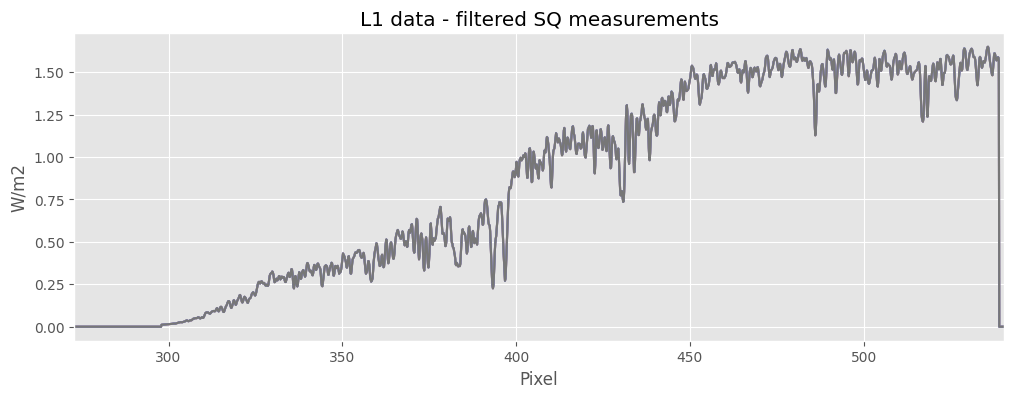

In [20]:
#Plot data

if FF["Level_blick"] in ["L1"]: #For L1 data
    fig, ax = plt.subplots()

    for row in Counts_s.index:
        spectra=Counts_s.loc[row].tolist()
        ax.plot(wv,spectra)

    plt.title("L1 data - filtered SQ measurements")
    plt.xlabel("Pixel")
    
    #For the Y label, we can check what is in the L1 data, if counts per second, or watts per square meters:
    data_type=DFf[FF["Columns"]["Corr_data_type"][0]].tolist()[0]
    if data_type==1:
        plt.ylabel("Counts/s")
    elif data_type==3:
        plt.ylabel("W/m2")

    plt.autoscale(enable=True, axis='x', tight=True)

elif FF["Level_blick"] in ["L0"]: #For L0 data

    fig, ax = plt.subplots()

    for row in Counts_s.index:
        spectra=Counts_s.loc[row].tolist()
        ax.plot(pixels,spectra)

    plt.title("L0 data - filtered SQ measurements")
    plt.xlabel("Pixel")
    plt.ylabel("Counts/s")

    plt.autoscale(enable=True, axis='x', tight=True)